## The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\customer_churn\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

col = "TotalCharges"  # replace with your column name

# Convert everything to string for checking
col_values = data[col].astype(str).str.strip()

# Check if value is numeric (float allowed)
is_numeric = col_values.str.replace(".", "", 1).str.isnumeric()

# Count valid vs invalid
counts = {
    "Numeric (valid floats)": is_numeric.sum(),
    "Non-numeric (chars/invalid)": (~is_numeric).sum()
}

# Print counts
for k, v in counts.items():
    print(f"{k}: {v}")

Numeric (valid floats): 7032
Non-numeric (chars/invalid): 11


In [6]:
col = "TotalCharges"  # replace with your column name

# Convert to string and strip spaces
col_values = data[col].astype(str).str.strip()

# Identify numeric values (float allowed)
is_numeric = col_values.str.replace(".", "", 1).str.isnumeric()

# Keep only numeric rows
data = data[is_numeric].copy()

In [7]:
# List the columns you want to convert
cols_to_convert = ["MonthlyCharges", "TotalCharges"]  # replace with your column names

# Convert to float64
data[cols_to_convert] = data[cols_to_convert].astype("float64")

In [8]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

customerID: 7032
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 72
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1584
TotalCharges: 6530
Churn: 2


In [9]:
import pandas as pd

# Assume your DataFrame is named 'data'

# 1️⃣ Create 6 equal-width bins for tenure
min_tenure = data['tenure'].min()
max_tenure = data['tenure'].max()

# Create the bin edges
bins = pd.interval_range(start=min_tenure, end=max_tenure, periods=6)

# Convert tenure to categorical labels in "x-y" format
labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in bins]
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, include_lowest=True).astype('object')

# 2️⃣ Convert SeniorCitizen 0/1 to 'No'/'Yes' and set as object
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('object')

# ✅ Check the results
print(data[['tenure', 'tenure_group', 'SeniorCitizen']].head())

   tenure                tenure_group SeniorCitizen
0       1                         NaN            No
1      34  (24.666666666666668, 36.5]            No
2       2   (1.0, 12.833333333333334]            No
3      45  (36.5, 48.333333333333336]            No
4       2   (1.0, 12.833333333333334]            No


In [10]:
data['tenure_group'].unique()

array([nan, Interval(24.666666666666668, 36.5, closed='right'),
       Interval(1.0, 12.833333333333334, closed='right'),
       Interval(36.5, 48.333333333333336, closed='right'),
       Interval(12.833333333333334, 24.666666666666668, closed='right'),
       Interval(60.16666666666667, 72.0, closed='right'),
       Interval(48.333333333333336, 60.16666666666667, closed='right')],
      dtype=object)

In [10]:
# 3️⃣ Drop the original 'tenure' column
data.drop('tenure', axis=1, inplace=True)

In [11]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group         object
dtype: object

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9860\812969311.py:14: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  data[col].value_counts().plot(


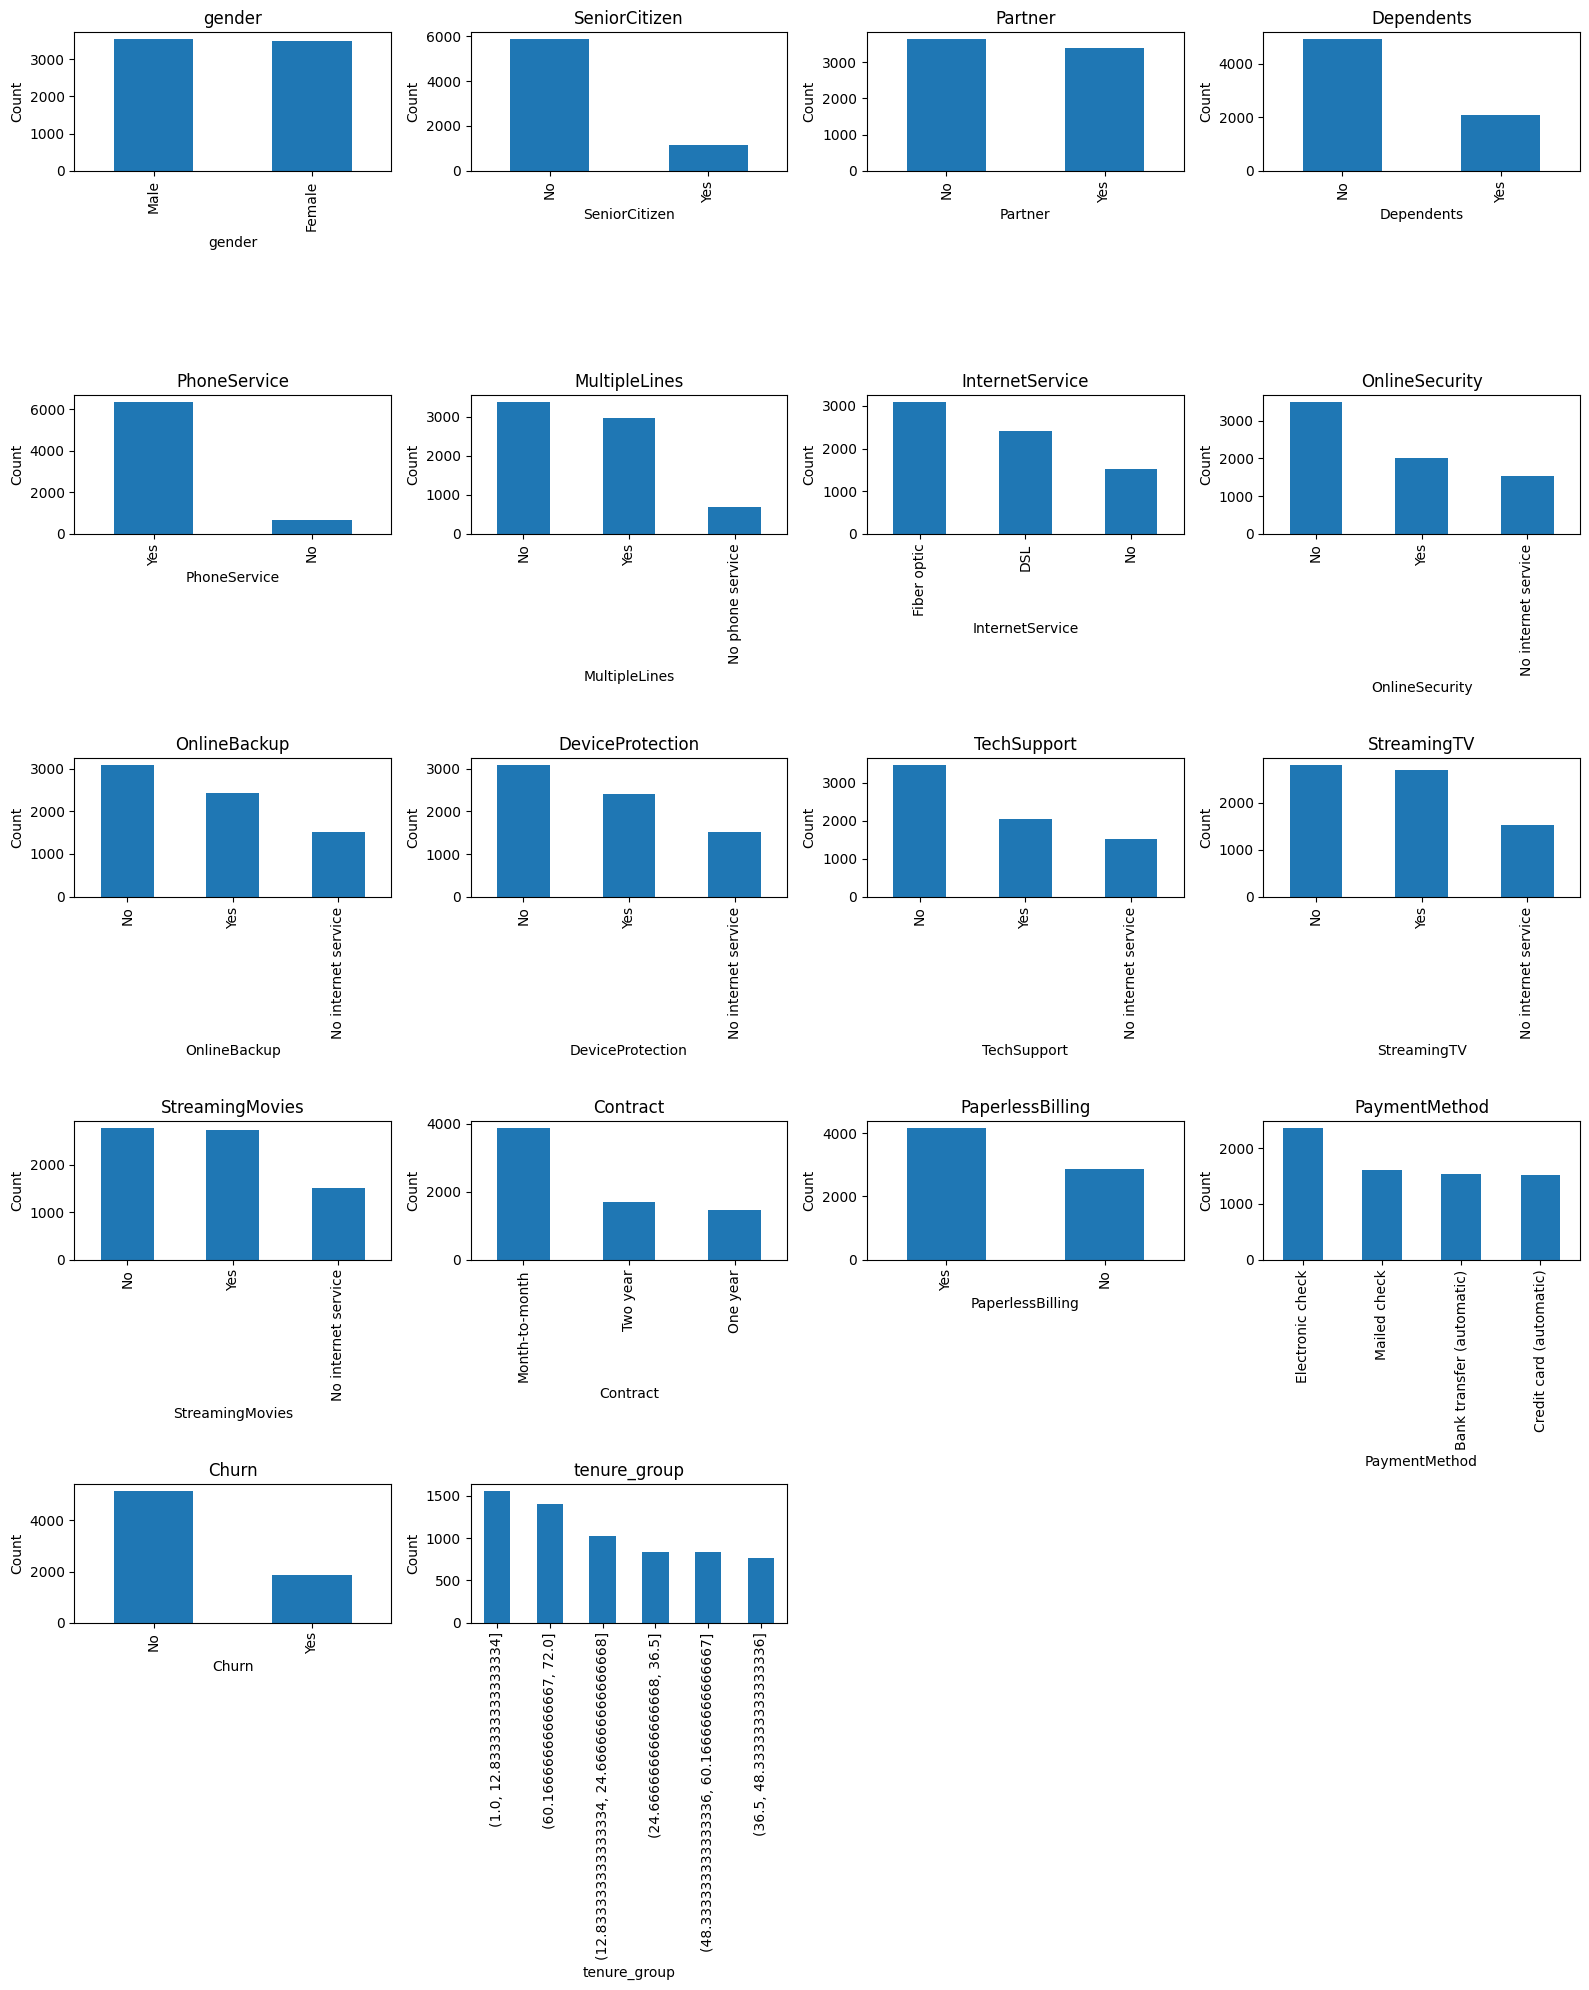

In [12]:
import matplotlib.pyplot as plt

# Filter columns with fewer than 5 unique categories
cat_cols = [col for col in data.columns if data[col].nunique() < 7]

# Number of subplots
n_cols = 4
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    data[col].value_counts().plot(
        kind="bar", ax=axes[i], title=col
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

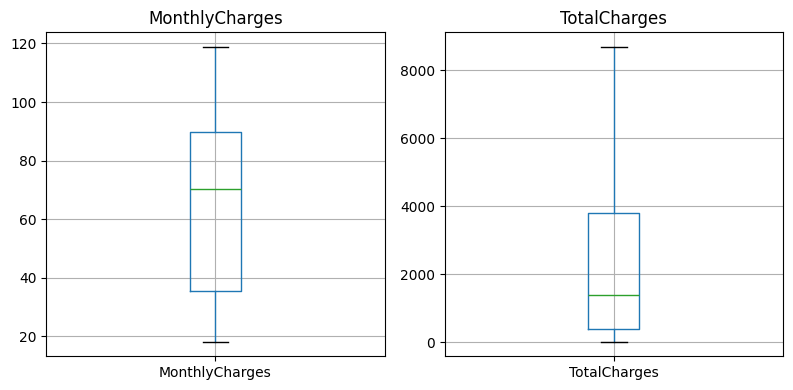

In [13]:
import matplotlib.pyplot as plt

# Filter columns with more than 5 unique categories
num_cols = [col for col in cols_to_convert]

# Number of subplots
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

# Check number of nulls in each column
null_counts = data.isnull().sum()
print(null_counts)

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
tenure_group        613
dtype: int64


In [15]:
print("Columns in data:", data.columns.tolist())

Columns in data: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']


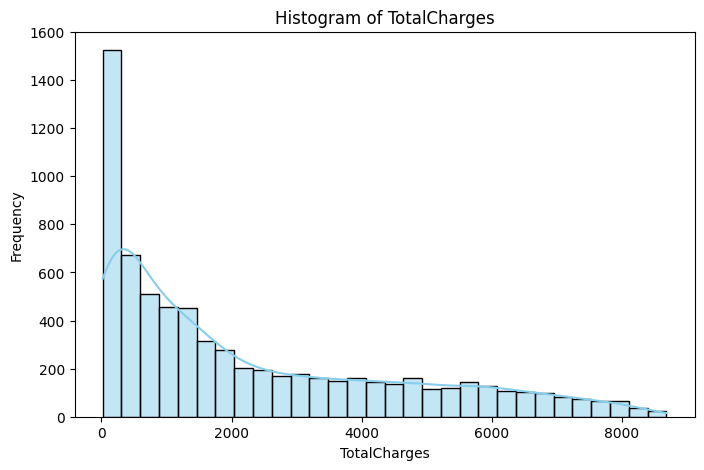

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert TotalCharges to numeric (coerce errors → NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop missing values if any
total_charges = data['TotalCharges'].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(total_charges, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of TotalCharges")
plt.xlabel("TotalCharges")
plt.ylabel("Frequency")
plt.show()

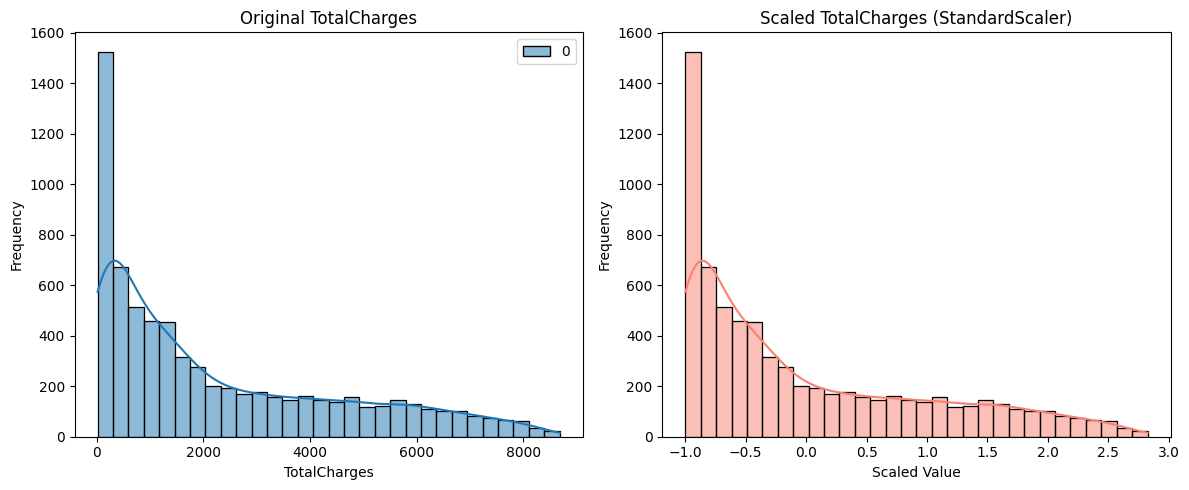

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure TotalCharges is numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
total_charges = data['TotalCharges'].dropna().values.reshape(-1, 1)

# Apply StandardScaler
scaler = StandardScaler()
total_charges_scaled = scaler.fit_transform(total_charges).flatten()

# Plot before & after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.histplot(total_charges, bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Original TotalCharges")
axes[0].set_xlabel("TotalCharges")
axes[0].set_ylabel("Frequency")

# Scaled
sns.histplot(total_charges_scaled, bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title("Scaled TotalCharges (StandardScaler)")
axes[1].set_xlabel("Scaled Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight

import pandas as pd
import numpy as np

# ----- Define columns -----
customer_id_col = "customerID"
target_col = "Churn"
numeric_cols = ['MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_group', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# ----- Features and target -----
X = data.drop([customer_id_col, target_col], axis=1)
y = data[target_col]

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Preprocessing -----
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----- Models to compare -----
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "RandomForest": RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    # Pipeline with preprocessing
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit model
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf.named_steps['classifier'], "predict_proba") else None
    
    # Metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Optional: Cross-validation AUC
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_auc = cross_val_score(clf, X_train, y_train, cv=kf, scoring='roc_auc')
    print("5-Fold CV AUC scores:", cv_auc)
    print("Mean CV AUC:", cv_auc.mean())
    
    # Save summary
    results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

# Optional: summary table
summary_df = pd.DataFrame(results)
print("\n===== Summary Table =====")
print(summary_df)


===== LogisticRegression =====
Accuracy: 0.7242359630419332
ROC AUC: 0.8358591610541956
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.70      0.79      1033
         Yes       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407

Confusion Matrix:
 [[720 313]
 [ 75 299]]
5-Fold CV AUC scores: [0.84570441 0.84737665 0.84783216 0.84898613 0.8540899 ]
Mean CV AUC: 0.8487978491663088

===== RandomForest =====


KeyboardInterrupt: 

In [17]:
# ----- Function to get aggregated feature importance -----
def get_feature_importance(clf, model_name, numeric_cols, categorical_cols):
    # Get feature names after preprocessing
    preprocessor = clf.named_steps['preprocessor']
    
    num_features = numeric_cols
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    feature_names = np.concatenate([num_features, cat_features])
    
    # Get raw importance / coefficients
    model = clf.named_steps['classifier']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])  # for binary classification
    else:
        print(f"No feature importance available for {model_name}")
        return None
    
    # Aggregate importances by original column
    agg_importances = {}
    for col in numeric_cols:
        agg_importances[col] = importances[feature_names == col][0]
    
    for col in categorical_cols:
        mask = np.array([col in f for f in feature_names])
        agg_importances[col] = importances[mask].sum()
    
    # Sort descending
    agg_importances = dict(sorted(agg_importances.items(), key=lambda x: x[1], reverse=True))
    return agg_importances


# ----- Loop through models and print feature importance -----
for name, model in models.items():
    if name not in ["KNN", "SVM"]:  # these don't have feature importance
        print(f"\n===== {name} Feature Importance =====")
        clf = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        clf.fit(X_train, y_train)
        fi = get_feature_importance(clf, name, numeric_cols, categorical_cols)
        if fi:
            for k, v in fi.items():
                print(f"{k}: {v:.4f}")


===== LogisticRegression Feature Importance =====
tenure_group: 3.8974
Contract: 1.7817
InternetService: 1.5633
StreamingTV: 0.7493
StreamingMovies: 0.7311
PaymentMethod: 0.5959
OnlineSecurity: 0.5243
MultipleLines: 0.5237
TechSupport: 0.4473
DeviceProtection: 0.4019
MonthlyCharges: 0.3934
OnlineBackup: 0.3666
TotalCharges: 0.2765
PaperlessBilling: 0.2498
Dependents: 0.2069
SeniorCitizen: 0.2045
PhoneService: 0.1486
gender: 0.1486
Partner: 0.1486

===== RandomForest Feature Importance =====
TotalCharges: 0.1534
Contract: 0.1299
MonthlyCharges: 0.1276
tenure_group: 0.0829
PaymentMethod: 0.0669
OnlineSecurity: 0.0557
TechSupport: 0.0477
InternetService: 0.0441
gender: 0.0346
OnlineBackup: 0.0318
DeviceProtection: 0.0312
PaperlessBilling: 0.0299
Partner: 0.0290
MultipleLines: 0.0281
StreamingTV: 0.0266
Dependents: 0.0256
StreamingMovies: 0.0251
SeniorCitizen: 0.0237
PhoneService: 0.0062

===== GradientBoosting Feature Importance =====
Contract: 0.3638
TotalCharges: 0.2141
MonthlyCharges:

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# ----- Columns -----
customer_id_col = "customerID"
target_col = "Churn"
numeric_cols = ['MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_group', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# ----- Features and target -----
X = data.drop([customer_id_col, target_col], axis=1)
y = data[target_col]

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Preprocessing -----
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----- Models -----
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "RandomForest": RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42)
    # KNN and SVM skipped since no importances
}

top_k_list = [15,15,17,18]
summary_results = []

# ----- Helper function -----
def get_top_features(model, preprocessor, X_train, top_k):
    # Transform training data
    X_train_proc = preprocessor.fit_transform(X_train)
    
    # Feature names
    feature_names_num = numeric_cols
    feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    feature_names = np.concatenate([feature_names_num, feature_names_cat])
    
    # Feature importance
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_).flatten()
    else:
        raise ValueError(f"No importance available for model {model}")
    
    # Aggregate categorical feature importances
    agg_importances = {}
    for i, name in enumerate(feature_names):
        base_name = name.split('_')[0] if '_' in name else name
        agg_importances[base_name] = agg_importances.get(base_name, 0) + importances[i]
    
    # Sort and select top_k
    sorted_features = sorted(agg_importances.items(), key=lambda x: x[1], reverse=True)
    top_features = [f[0] for f in sorted_features[:top_k]]
    return top_features

# ----- Run models for each top_k -----
for top_k in top_k_list:
    print(f"\n===== Top K = {top_k} =====")
    
    for name, model in models.items():
        print(f"\n--- {name} ---")
        
        # Initial fit on full features to get importance
        preprocessor.fit(X_train)
        X_train_proc = preprocessor.transform(X_train)
        model.fit(X_train_proc, y_train)
        
        # Get top_k features
        top_features = get_top_features(model, preprocessor, X_train, top_k)
        
        # Reduce X_train and X_test to top features
        all_feature_names = np.concatenate([numeric_cols, preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)])
        top_idx = [i for i, f in enumerate(all_feature_names) if f.split('_')[0] in top_features]
        X_train_top = X_train_proc[:, top_idx]
        X_test_top = preprocessor.transform(X_test)[:, top_idx]
        
        # SMOTEENN resampling
        smoteenn = SMOTEENN(random_state=42)
        X_res, y_res = smoteenn.fit_resample(X_train_top, y_train)
        
        # Refit model on resampled top features
        model.fit(X_res, y_res)
        
        # Predictions
        y_pred = model.predict(X_test_top)
        y_prob = model.predict_proba(X_test_top)[:,1] if hasattr(model, "predict_proba") else None
        
        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = classification_report(y_test, y_pred, output_dict=True)['macro avg']['precision']
        recall = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
        f1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
        
        # Save results
        summary_results.append({
            "model": name,
            "top_k": top_k,
            "features": top_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc": roc_auc
        })

# ----- Summary table -----
summary_df = pd.DataFrame(summary_results)
print("\n===== Summary Table =====")
print(summary_df)


===== Top K = 13 =====

--- LogisticRegression ---

--- RandomForest ---

--- GradientBoosting ---

--- DecisionTree ---

===== Top K = 16 =====

--- LogisticRegression ---

--- RandomForest ---

--- GradientBoosting ---

--- DecisionTree ---

===== Summary Table =====
                model  top_k  \
0  LogisticRegression     13   
1        RandomForest     13   
2    GradientBoosting     13   
3        DecisionTree     13   
4  LogisticRegression     16   
5        RandomForest     16   
6    GradientBoosting     16   
7        DecisionTree     16   

                                            features  accuracy  precision  \
0  [tenure, Contract, InternetService, StreamingT...  0.697939   0.691913   
1  [TotalCharges, Contract, MonthlyCharges, tenur...  0.741294   0.701477   
2  [Contract, TotalCharges, MonthlyCharges, Inter...  0.731343   0.700233   
3  [Contract, TotalCharges, MonthlyCharges, Inter...  0.715707   0.682680   
4  [tenure, Contract, InternetService, StreamingT...  0

In [16]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn pipeline

# ----- Define columns -----
customer_id_col = "customerID"
target_col = "Churn"
numeric_cols = ['MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_group', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# ----- Features and target -----
X = data.drop([customer_id_col, target_col], axis=1)
y = data[target_col]

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Preprocessing -----
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----- Helper function -----
def train_evaluate_dt(X_train, y_train, X_test, y_test, use_smoteenn=False, tune=False):
    """Train and evaluate a Decision Tree classifier, optionally with SMOTE+ENN and tuning."""
    steps = [('preprocessor', preprocessor)]
    if use_smoteenn:
        steps.append(('smoteenn', SMOTEENN(random_state=42)))
    steps.append(('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42)))
    
    clf = ImbPipeline(steps)
    
    if tune:
        # ---- Hyperparameter grid ----
        param_grid = {
            'classifier__max_depth': [3, 5, 10, None],
            'classifier__min_samples_split': [2, 5, 10, 20],
            'classifier__min_samples_leaf': [1, 2, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
        
        grid_search = GridSearchCV(
            clf,
            param_grid,
            scoring='f1_macro',   # or 'balanced_accuracy', 'recall_macro'
            cv=5,
            n_jobs=-1,
            verbose=1
        )
        
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        
        tree_model = best_clf.named_steps['classifier']
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'n_leaves': tree_model.get_n_leaves(),
            'size': tree_model.tree_.node_count,
            'train_time': train_time,
            'y_pred': y_pred,
            'best_params': grid_search.best_params_
        }
    else:
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
        y_pred = clf.predict(X_test)
        
        tree_model = clf.named_steps['classifier']
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'n_leaves': tree_model.get_n_leaves(),
            'size': tree_model.tree_.node_count,
            'train_time': train_time,
            'y_pred': y_pred,
            'best_params': None
        }

# ----- Train and evaluate -----
before_res = train_evaluate_dt(X_train, y_train, X_test, y_test, use_smoteenn=False, tune=True)
after_res  = train_evaluate_dt(X_train, y_train, X_test, y_test, use_smoteenn=True, tune=True)

# ----- Print results -----
print("=== Decision Tree BEFORE SMOTE+ENN ===")
print("Accuracy:", before_res['accuracy'])
print("Number of Leaves:", before_res['n_leaves'])
print("Tree Size:", before_res['size'])
print("Training Time (s):", round(before_res['train_time'], 2))
print("Best Params:", before_res['best_params'])
print("Classification Report:\n", classification_report(y_test, before_res['y_pred']))
print("Confusion Matrix:\n", before_res['confusion_matrix'])

print("\n=== Decision Tree AFTER SMOTE+ENN ===")
print("Accuracy:", after_res['accuracy'])
print("Number of Leaves:", after_res['n_leaves'])
print("Tree Size:", after_res['size'])
print("Training Time (s):", round(after_res['train_time'], 2))
print("Best Params:", after_res['best_params'])
print("Classification Report:\n", classification_report(y_test, after_res['y_pred']))
print("Confusion Matrix:\n", after_res['confusion_matrix'])

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
=== Decision Tree BEFORE SMOTE+ENN ===
Accuracy: 0.7313432835820896
Number of Leaves: 31
Tree Size: 61
Training Time (s): 38.93
Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.71      0.80      1033
         Yes       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

Confusion Matrix:
 [[738 295]
 [ 83 291]]

=== Decision Tree AFTER SMOTE+ENN ===
Accuracy: 0.7029140014214641
Number of Leaves: 150
Tree Size: 299
Training Time (s): 178.44
Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': None

In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn pipeline

# ----- Define columns -----
customer_id_col = "customerID"
target_col = "Churn"
numeric_cols = ['MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_group', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# ----- Features and target -----
X = data.drop([customer_id_col, target_col], axis=1)
y = data[target_col]

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Preprocessing -----
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----- Helper function -----
def train_evaluate_dt(X_train, y_train, X_test, y_test, use_smoteenn=False, tune=False):
    """Train and evaluate a Decision Tree classifier, optionally with SMOTE+ENN and tuning."""
    steps = [('preprocessor', preprocessor)]
    if use_smoteenn:
        steps.append(('smoteenn', SMOTEENN(random_state=42)))
    steps.append(('classifier', DecisionTreeClassifier(random_state=42)))
    
    clf = ImbPipeline(steps)
    
    if tune:
        # ---- Hyperparameter grid ----
        param_grid = {
            'classifier__max_depth': [3, 5, 10, None],
            'classifier__min_samples_split': [2, 5, 10, 20],
            'classifier__min_samples_leaf': [1, 2, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
        
        grid_search = GridSearchCV(
            clf,
            param_grid,
            scoring='f1_macro',   # or 'balanced_accuracy', 'recall_macro'
            cv=5,
            n_jobs=-1,
            verbose=1
        )
        
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        
        tree_model = best_clf.named_steps['classifier']
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'n_leaves': tree_model.get_n_leaves(),
            'size': tree_model.tree_.node_count,
            'train_time': train_time,
            'y_pred': y_pred,
            'best_params': grid_search.best_params_
        }
    else:
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
        y_pred = clf.predict(X_test)
        
        tree_model = clf.named_steps['classifier']
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'n_leaves': tree_model.get_n_leaves(),
            'size': tree_model.tree_.node_count,
            'train_time': train_time,
            'y_pred': y_pred,
            'best_params': None
        }

# ----- Train and evaluate -----
before_res = train_evaluate_dt(X_train, y_train, X_test, y_test, use_smoteenn=False, tune=True)
after_res  = train_evaluate_dt(X_train, y_train, X_test, y_test, use_smoteenn=True, tune=True)

# ----- Print results -----
print("=== Decision Tree BEFORE SMOTE+ENN ===")
print("Accuracy:", before_res['accuracy'])
print("Number of Leaves:", before_res['n_leaves'])
print("Tree Size:", before_res['size'])
print("Training Time (s):", round(before_res['train_time'], 2))
print("Best Params:", before_res['best_params'])
print("Classification Report:\n", classification_report(y_test, before_res['y_pred']))
print("Confusion Matrix:\n", before_res['confusion_matrix'])

print("\n=== Decision Tree AFTER SMOTE+ENN ===")
print("Accuracy:", after_res['accuracy'])
print("Number of Leaves:", after_res['n_leaves'])

print("Tree Size:", after_res['size'])
print("Training Time (s):", round(after_res['train_time'], 2))
print("Best Params:", after_res['best_params'])
print("Classification Report:\n", classification_report(y_test, after_res['y_pred']))
print("Confusion Matrix:\n", after_res['confusion_matrix'])

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
=== Decision Tree BEFORE SMOTE+ENN ===
Accuracy: 0.7882018479033405
Number of Leaves: 31
Tree Size: 61
Training Time (s): 43.21
Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.86      0.86      1033
         Yes       0.60      0.59      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Confusion Matrix:
 [[888 145]
 [153 221]]

=== Decision Tree AFTER SMOTE+ENN ===
Accuracy: 0.7007818052594172
Number of Leaves: 144
Tree Size: 287
Training Time (s): 178.69
Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth'

In [18]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn pipeline

# ----- Define columns -----
customer_id_col = "customerID"
target_col = "Churn"
numeric_cols = ['MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_group', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# ----- Features and target -----
X = data.drop([customer_id_col, target_col], axis=1)
y = data[target_col]

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Preprocessing -----
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----- Helper function -----
def train_evaluate_rf(X_train, y_train, X_test, y_test, use_smoteenn=False, tune=False):
    """Train and evaluate a Random Forest classifier, optionally with SMOTE+ENN and tuning."""
    steps = [('preprocessor', preprocessor)]
    if use_smoteenn:
        steps.append(('smoteenn', SMOTEENN(random_state=42)))
    steps.append(('classifier', RandomForestClassifier(random_state=42)))
    
    clf = ImbPipeline(steps)
    
    if tune:
        # ---- Hyperparameter grid ----
        param_grid = {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__criterion': ['gini', 'entropy']
        }
        
        grid_search = GridSearchCV(
            clf,
            param_grid,
            scoring='f1_macro',   # or 'balanced_accuracy', 'recall_macro'
            cv=5,
            n_jobs=-1,
            verbose=1
        )
        
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        
        rf_model = best_clf.named_steps['classifier']
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'n_estimators': rf_model.n_estimators,
            'train_time': train_time,
            'y_pred': y_pred,
            'best_params': grid_search.best_params_
        }
    else:
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
        y_pred = clf.predict(X_test)
        
        rf_model = clf.named_steps['classifier']
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'n_estimators': rf_model.n_estimators,
            'train_time': train_time,
            'y_pred': y_pred,
            'best_params': None
        }

# ----- Train and evaluate -----
before_res = train_evaluate_rf(X_train, y_train, X_test, y_test, use_smoteenn=False, tune=True)
after_res  = train_evaluate_rf(X_train, y_train, X_test, y_test, use_smoteenn=True, tune=True)

# ----- Print results -----
print("=== Random Forest BEFORE SMOTE+ENN ===")
print("Accuracy:", before_res['accuracy'])
print("Number of Estimators:", before_res['n_estimators'])
print("Training Time (s):", round(before_res['train_time'], 2))
print("Best Params:", before_res['best_params'])
print("Classification Report:\n", classification_report(y_test, before_res['y_pred']))
print("Confusion Matrix:\n", before_res['confusion_matrix'])

print("\n=== Random Forest AFTER SMOTE+ENN ===")
print("Accuracy:", after_res['accuracy'])
print("Number of Estimators:", after_res['n_estimators'])
print("Training Time (s):", round(after_res['train_time'], 2))
print("Best Params:", after_res['best_params'])
print("Classification Report:\n", classification_report(y_test, after_res['y_pred']))
print("Confusion Matrix:\n", after_res['confusion_matrix'])

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
=== Random Forest BEFORE SMOTE+ENN ===
Accuracy: 0.7945984363894811
Number of Estimators: 200
Training Time (s): 715.73
Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.90      0.86      1033
         Yes       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Confusion Matrix:
 [[925 108]
 [181 193]]

=== Random Forest AFTER SMOTE+ENN ===
Accuracy: 0.7164179104477612
Number of Estimators: 200
Training Time (s): 1206.5
Best Params: {'classifier__criterion': 'gini', 'classifier